In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [3]:
import pandas as pd
train_data = pd.read_csv(r"C:\Users\Yash\Downloads\archive\Genre Classification Dataset\train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(train_data.head())
print(train_data.shape)


# test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
# print(display(test_data.head()))
# print(test_data.shape)



C:\Users\Yash\AppData\Local\Temp\ipykernel_10076\3186052263.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv(r"C:\Users\Yash\Downloads\archive\Genre Classification Dataset\train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


In [4]:
test_data = pd.read_csv(r"C:\Users\Yash\Downloads\archive\Genre Classification Dataset\test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_data.head()))
print(test_data.shape)

C:\Users\Yash\AppData\Local\Temp\ipykernel_10076\836784627.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv(r"C:\Users\Yash\Downloads\archive\Genre Classification Dataset\test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


None
(54200, 4)


In [5]:
test_solution_data = pd.read_csv(r"C:\Users\Yash\Downloads\archive\Genre Classification Dataset\test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_solution_data.head()))
print(test_solution_data.shape)

C:\Users\Yash\AppData\Local\Temp\ipykernel_10076\1860208784.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv(r"C:\Users\Yash\Downloads\archive\Genre Classification Dataset\test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None
(54200, 4)


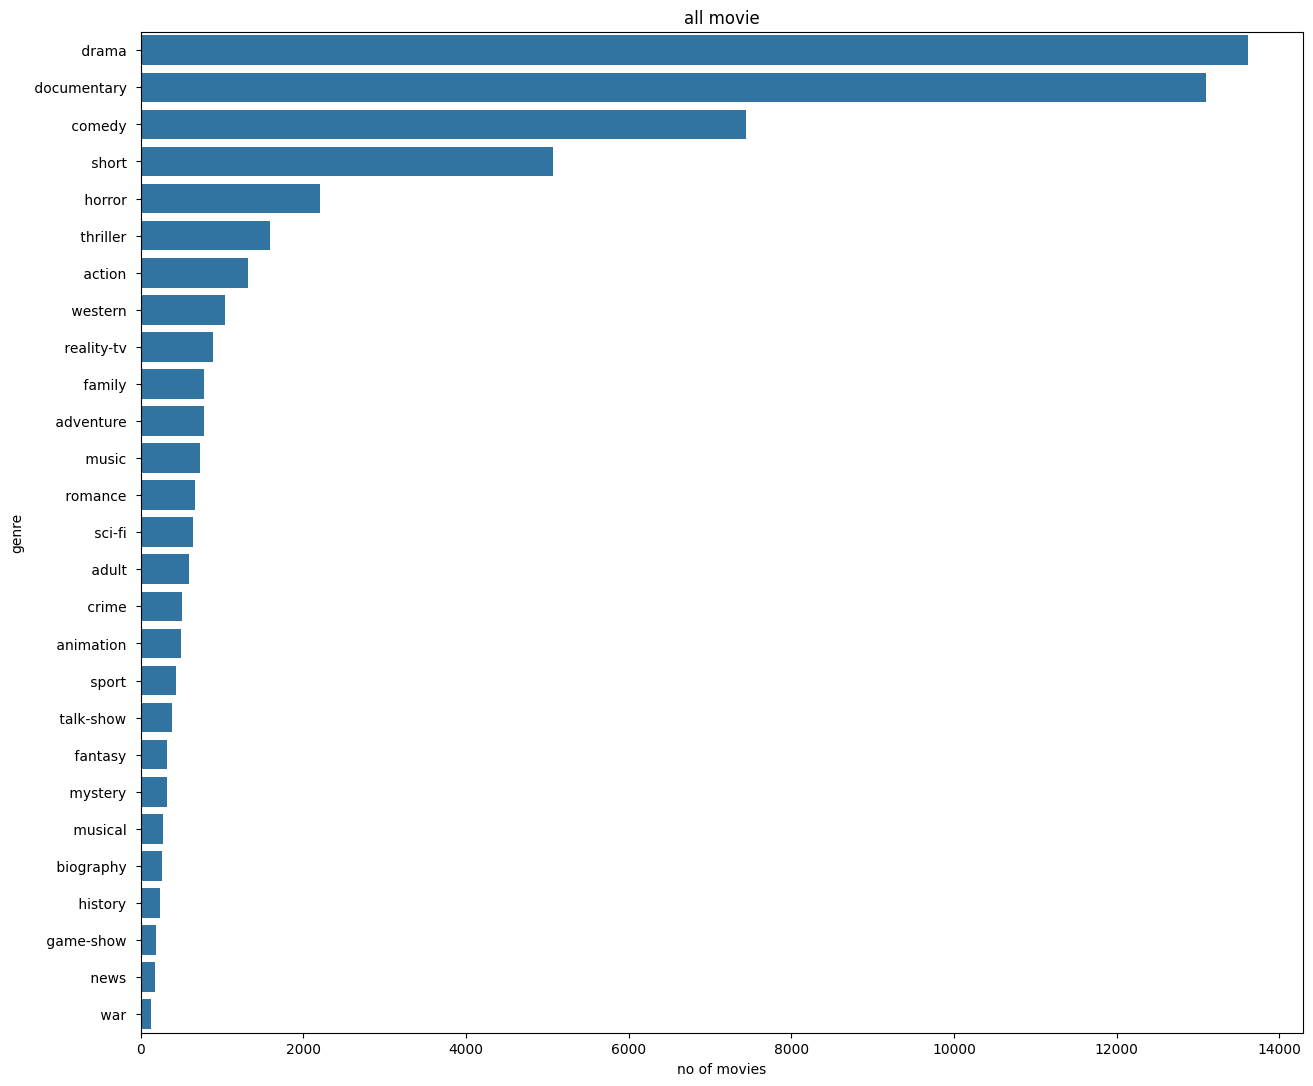

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,13))
sns.countplot(y=train_data['GENRE'],order=train_data['GENRE'].value_counts().index)
plt.title("all movie")
plt.xlabel('no of movies')
plt.ylabel('genre')
plt.show()

#bar  Representation of genre vs description legth

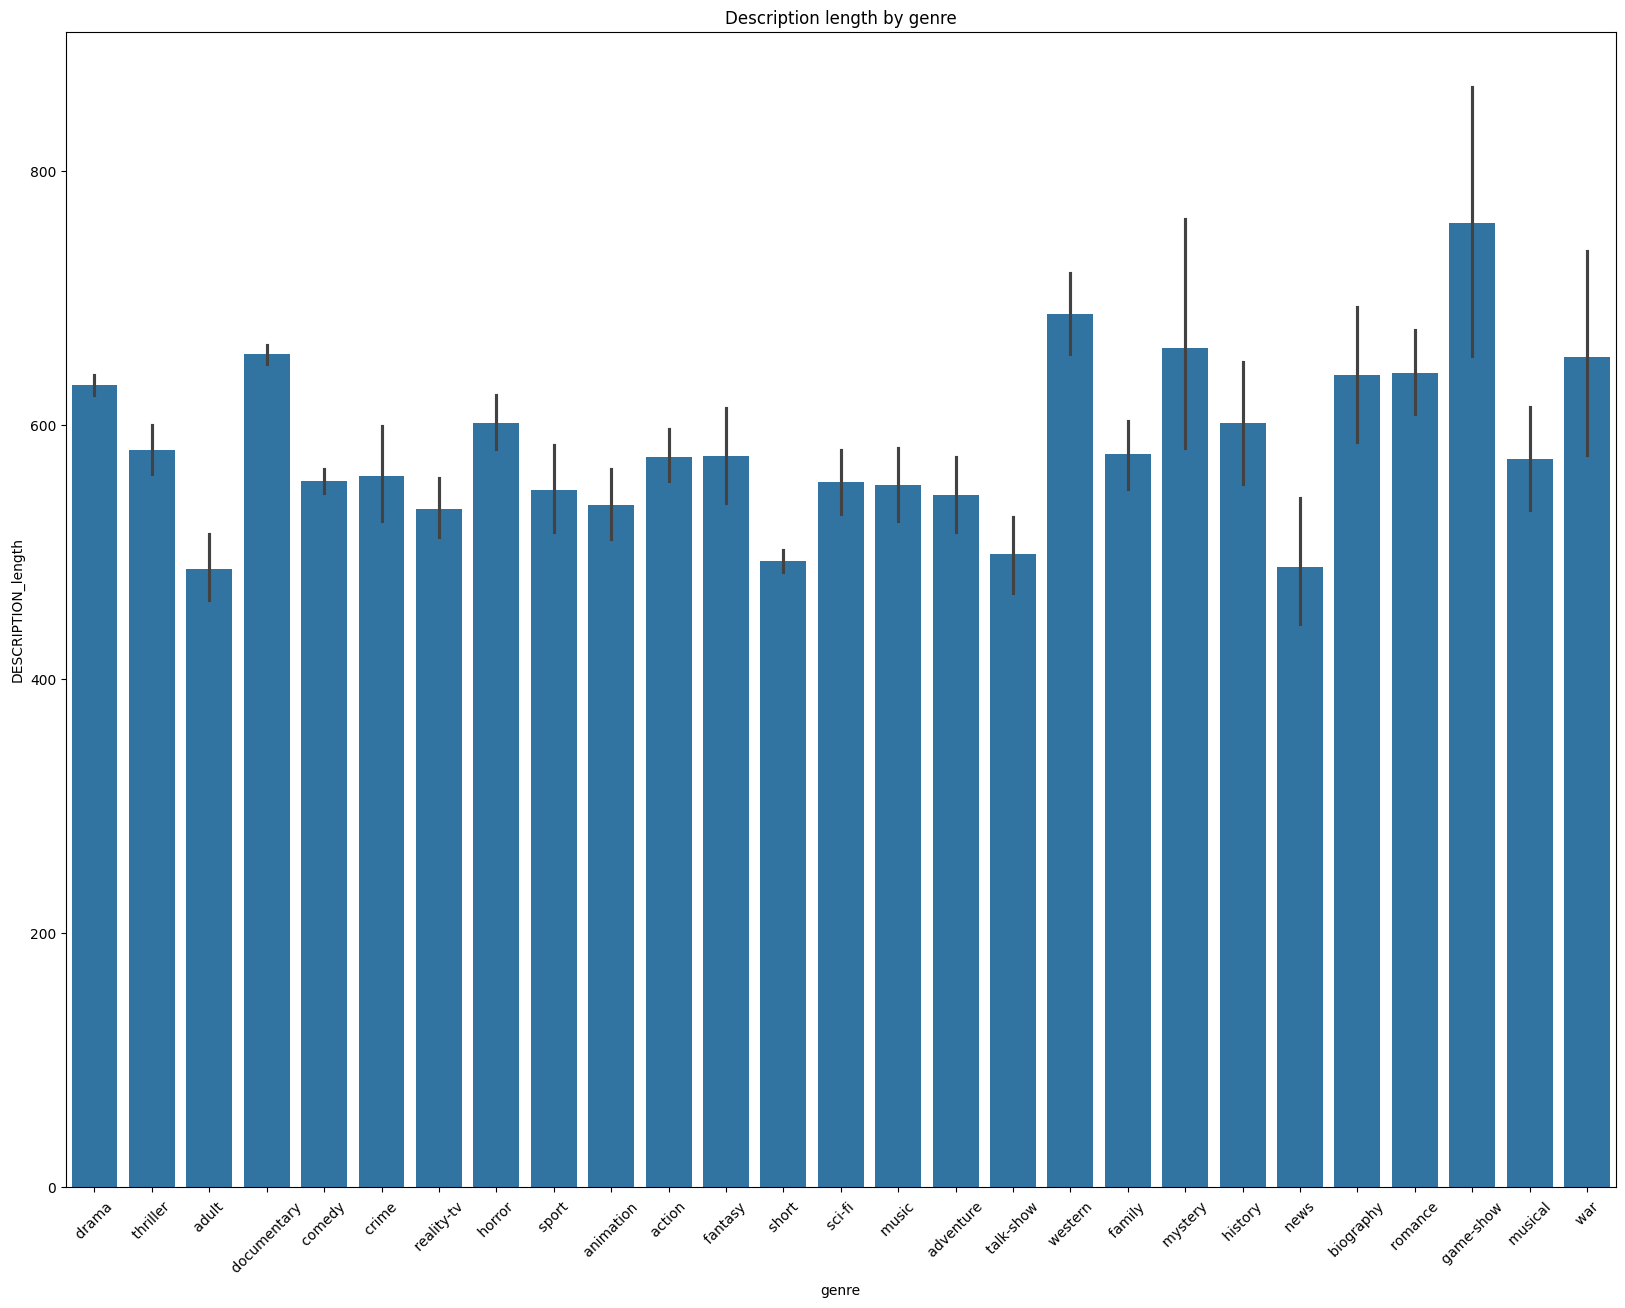

In [7]:
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(20,15))
sns.barplot(x='GENRE',y='DESCRIPTION_length',data=train_data)
plt.title('Description length by genre')
plt.xticks(rotation=45)
plt.xlabel('genre')
plt.ylabel('DESCRIPTION_length')
plt.show()

In [2]:
#  search to people's best genre

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

train_data['DESCRIPTION'].fillna("",inplace=True)
test_data['DESCRIPTION'].fillna("",inplace=True)

t=TfidfVectorizer(stop_words='english',max_features=100000)
x_train=t.fit_transform(train_data['DESCRIPTION'])
x_test=t.transform(test_data['DESCRIPTION'])

lable_encoder=LabelEncoder()
y_train=lable_encoder.fit_transform(train_data['GENRE'])
y_test=lable_encoder.transform(test_solution_data['GENRE'])

C:\Users\Yash\AppData\Local\Temp\ipykernel_10076\2970266321.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_data['DESCRIPTION'].fillna("",inplace=True)


In [9]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

x_train_sub,x_val,y_train_sub,y_val = train_test_split(x_train,y_train,test_size=0.2)

clf = LinearSVC()
clf.fit(x_train_sub,y_train_sub)

y_val_pred = clf.predict(x_val)

print("Validation Accuracy:",accuracy_score(y_val,y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val,y_val_pred))

c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Validation Accuracy: 0.5825878446924283
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.33      0.36       250
           1       0.62      0.47      0.53       107
           2       0.46      0.15      0.23       155
           3       0.44      0.12      0.19       102
           4       0.00      0.00      0.00        41
           5       0.54      0.59      0.56      1468
           6       0.50      0.09      0.15       102
           7       0.69      0.82      0.75      2644
           8       0.56      0.72      0.63      2697
           9       0.47      0.16      0.23       154
          10       0.31      0.07      0.12        56
          11       0.67      0.56      0.61        32
          12       0.14      0.02      0.04        43
          13       0.61      0.62      0.62       468
          14       0.62      0.53      0.57       131
          15       0.29      0.03      0.06        58
      

In [10]:
y_pred = clf.predict(x_test)

print("Validation Accuracy:",accuracy_score(y_test,y_pred))
print("Validation Classification Report:\n", classification_report(y_test,y_pred))

Validation Accuracy: 0.09357933579335793
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
     

c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [11]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train,y_train)

MultinomialNB()

In [12]:
NB_classifier.predict(x_test)

array([8, 8, 8, ..., 8, 8, 8])

In [13]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression(max_iter=400)
log_classifier.fit(x_train,y_train)

LogisticRegression(max_iter=400)

In [14]:
log_classifier.predict(x_test)

array([8, 8, 8, ..., 8, 8, 8])

In [15]:
def predict_movie(description):
    t1=t.transform([description])
    pred_label=clf.predict(t1)
    return lable_encoder.inverse_transform(pred_label)[0]

sample = " A Movie where men left house and travel arround the world and feel empty"
print(predict_movie(sample))

sample=" Forrest again reunites with Jenny, ... Forrest Gump Jr., revealing that Forrest is his father. Initially shocked at the revelation, Forrest starts to bond with his son. Jenny tells Forrest that she is sick with some kind of virus, and the doctors cannot do anything for her. Jenny proposes marriage to Forrest, which he happily accepts, and the three move back to ..."
print(predict_movie(sample))

 comedy 
 documentary 
